In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from geopy import distance
#from geopy.distance import vincenty
from pyproj import Geod

In [2]:
orders = pd.read_csv("~/schoolfolder/githubstuff/Restaurants/DATA/orders.csv") 
#customers = pd.read_csv("~/schoolfolder/githubstuff/Restaurants/DATA/train_customers.csv") 
#vendors = pd.read_csv("~/schoolfolder/githubstuff/Restaurants/DATA/rest_vendors.csv") 
#location = pd.read_csv("~/schoolfolder/githubstuff/Restaurants/DATA/train_locations.csv") 
#real = pd.read_csv("~/schoolfolder/githubstuff/Restaurants/DATA/test_full.csv") 
df = pd.read_csv("~/schoolfolder/githubstuff/Restaurants/DATA/train_full.csv")

/Users/belisariomontesinos/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/belisariomontesinos/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Testing to see if the linear model works. Picked random columns, thats why it is not a good model.
linear_model = smf.ols(formula='target ~ delivery_charge + C(verified_x) + C(vendor_rating) + device_type' , data=df).fit()

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     427.3
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:59:37   Log-Likelihood:             4.3019e+06
No. Observations:             5802400   AIC:                        -8.604e+06
Df Residuals:                 5802385   BIC:                        -8.604e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0046      0.001      4.938      0.000       0.003       0.006
C(verified_x)[T.1]          0.0046      0.000     15.978      0.000       0.004       0.005
C(vendor_rating)[T.3.7]    -0.0023      0.001     -3.326      0.001      -0.004      -0.001
C(vendor_rating)[T.3.8]    -0.0041      0.001     -6.900      0.000      -0.005      -0.003
C(vendor_rating)[T.4.0]    -0.0041      0.001     -7.860      0.000      -0.005      -0.003
C(vendor_rating)[T.4.1]     0.0002      0.001      0.333      0.739      -0.001       0.001
C(vendor_rating)[T.4.2]     0.0020      0.000      4.085      0.000       0.001       0.003
C(vendor_rating)[T.4.3]     0.0029      0.000      5.890      0.000       0.002       0.004
C(vendor_rating)[T.4.4]     0.0020      0.000      3.980      0.000       0.001       0.003
C(vendor_rating)[T.4.5]     0.0035      0.000      7.195      0.000       0.003       0.005
C(vendor_rating)[T.4.6]     0.0015      0.001      2.895      0.004       0.000       0.002
C(vendor_rating)[T.4.7]     0.0061      0.001     11.925      0.000       0.005       0.007
C(vendor_rating)[T.4.8]    -0.0058      0.001     -9.785      0.000      -0.007      -0.005
delivery_charge            -0.0076      0.000    -53.152      0.000      -0.008      -0.007
device_type                 0.0019      0.000      7.743      0.000       0.001       0.002
==============================================================================
Omnibus:                  7996354.204   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1220320387.899
Skew:                           8.423   Prob(JB):                         0.00
Kurtosis:                      72.020   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
df['target'].value_counts(dropna=False)

0    5724146
1      78254
Name: target, dtype: int64

In [5]:
s1 = set(orders['CID X LOC_NUM X VENDOR'])
s2 = set(df['CID X LOC_NUM X VENDOR'])
len(s2)
len(
    s1.intersection(s2)
)

78254

In [7]:
ndf = df.merge(orders, on = 'CID X LOC_NUM X VENDOR', how = 'outer')

In [8]:
a1 = set(df['CID X LOC_NUM X VENDOR'])
a2 = set(orders['CID X LOC_NUM X VENDOR'])
a3 = a1.intersection(a2)
#a3 #this shows too many, I just want to see maybe 5

In [9]:
ndf[ndf['CID X LOC_NUM X VENDOR'] == 'D3TQCRQ X 0 X 90'] 
#just to check if all the columns are filled up (see if our merge worked)

,customer_id_x,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,location_type,latitude_x,longitude_x,...,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE
4049515,D3TQCRQ,Male,1.000000,1.000000,2019-10-01 01:27:35,2019-11-16 16:29:39,0.000000,Other,-0.101560,-78.560000,...,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,2019-10-01 05:28:17,0.000000,NaN


In [6]:
pd.set_option('float_format', '{:f}'.format)
df[['latitude_x','longitude_x','latitude_y','longitude_y']].describe()

,latitude_x,longitude_x,latitude_y,longitude_y
count,5801800.000000,5801800.000000,5802400.000000,5802400.000000
mean,2.355730,-25.152688,1.875090,0.803796
std,22.760454,36.953472,20.493402,4.376724
min,-1038.000000,-134.400000,-1.787000,-1.449000
25%,-0.503400,-78.500000,-0.809100,0.081615
50%,-0.088260,0.021065,-0.493400,0.527150
75%,0.261000,0.513000,0.015922,0.644875
max,453.800000,45.340000,205.200000,44.220000


In [10]:
ndf['target'].value_counts()
#how many orders placed

0.000000    5724146
1.000000     132027
Name: target, dtype: int64

In [14]:
#df = ndf.copy()
#nicedf = ndf[(ndf['latitude_x'] > 90) | (ndf['longitude_x'] > 180) | (ndf['latitude_x'] < -90) | (ndf['longitude_x'] < -180) | (ndf['latitude_y'] > 90) | (ndf['longitude_y'] > 180) | (ndf['latitude_y'] < -90) | (ndf['longitude_y'] < -180)]

testdf = cdf.merge(nicedf, on = 'CID X LOC_NUM X VENDOR', indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [27]:
((ndf['latitude_x'] > 90) | (ndf['longitude_x'] > 180) | (ndf['latitude_x'] < -90) | (ndf['longitude_x'] < -180) | (ndf['latitude_y'] > 90) | (ndf['longitude_y'] > 180) | (ndf['latitude_y'] < -90) | (ndf['longitude_y'] < -180)).value_counts()

False    5673475
True      185974
dtype: int64

In [30]:
((testdf['latitude_x_x'] > 90) | (testdf['longitude_x_x'] > 180) | (testdf['latitude_x_x'] < -90) | (testdf['longitude_x_x'] < -180) | (testdf['latitude_y_y'] > 90) | (testdf['longitude_y_y'] > 180) | (testdf['latitude_y_y'] < -90) | (testdf['longitude_y_y'] < -180)).value_counts()

False    5673475
dtype: int64

In [31]:
#funnies = df[(df['latitude_x'] > 90) | (df['longitude_x'] > 180) | (df['latitude_x'] < -90) | (df['longitude_x'] < -180) | (df['latitude_y'] > 90) | (df['longitude_y'] > 180) | (df['latitude_y'] < -90) | (df['longitude_y'] < -180)]
#funnies['target'].value_counts()
#xdf = ndf[(ndf['latitude_x'] > 90) | (ndf['longitude_x'] > 180) | (ndf['latitude_x'] < -90) | (ndf['longitude_x'] < -180) | (ndf['latitude_y'] > 90) | (ndf['longitude_y'] > 180) | (ndf['latitude_y'] < -90) | (ndf['longitude_y'] < -180)]
#xdf['target'].value_counts() = ndf
nicedf = ndf[(ndf['latitude_x'] > 90) | (ndf['longitude_x'] > 180) | (ndf['latitude_x'] < -90) | (ndf['longitude_x'] < -180) | (ndf['latitude_y'] > 90) | (ndf['longitude_y'] > 180) | (ndf['latitude_y'] < -90) | (ndf['longitude_y'] < -180)]
#cond = ndf.isin(xdf)
#ndf.drop(ndf[cond].index, inplace = True)
#ndf.info()
#df[(df['latitude_x'] < -90) & (df['target'] > 0)]
# check how many lat and long values are < -90 or > 90
# check how many of those are target=1 (when orders were placed)
# if not too many of the faulty lat and long values are when order was placed, drop these rows
# then distance calc should work

In [80]:
def distance_calc (row):
    start = (row['latitude_x_x'], row['longitude_x_x'])
    stop = (row['latitude_y_x'], row['longitude_y_x'])

    return distance.distance(start, stop).meters

In [82]:
#testdf['distance'] = testdf.apply (lambda row: distance_calc (row),axis=1)

In [39]:
(testdf['latitude_x_x'].isnull() | testdf['longitude_x_x'].isnull() | testdf['latitude_y_y'].isnull() | testdf['longitude_y_y'].isnull()).value_counts()

True    5673475
dtype: int64

In [40]:
testdf['longitude_x_x'].isnull().value_counts()

False    5669605
True        3870
Name: longitude_x_x, dtype: int64

In [58]:
nulldf = (testdf[['latitude_x_x','longitude_x_x','latitude_y_x','longitude_y_x']].isnull())
nulldf['ntarget'] = testdf['target_x']
nulldf

,latitude_x_x,longitude_x_x,latitude_y_x,longitude_y_x,ntarget
200,False,False,False,False,0.000000
201,False,False,False,False,0.000000
202,False,False,False,False,0.000000
203,False,False,False,False,0.000000
204,False,False,False,False,0.000000
...,...,...,...,...,...
5861120,True,True,True,True,nan
5861121,True,True,True,True,nan
5861122,True,True,True,True,nan
5861123,True,True,True,True,nan


In [66]:
nulldf.loc[((nulldf['latitude_x_x'] == True) & (nulldf['ntarget'] == 1)) | ((nulldf['latitude_y_x'] == True) & (nulldf['ntarget'] == 1)) | ((nulldf['longitude_x_x'] == True) & (nulldf['ntarget'] == 1)) | ((nulldf['longitude_y_x'] == True) & (nulldf['ntarget'] == 1))]



,latitude_x_x,longitude_x_x,latitude_y_x,longitude_y_x,ntarget
112702,True,True,False,False,1.000000
429047,True,True,False,False,1.000000
538855,True,True,False,False,1.000000
1404626,True,True,False,False,1.000000


In [76]:
testdf = testdf[testdf['latitude_x_x'].notna()]
testdf = testdf[testdf['latitude_y_x'].notna()]
testdf = testdf[testdf['longitude_x_x'].notna()]
testdf = testdf[testdf['longitude_y_x'].notna()]
testdf['longitude_x_x'].isnull().value_counts()

False    5669605
Name: longitude_x_x, dtype: int64

3@1ght%$$#kjklll

In [85]:
testdf['target_x'].value_counts(dropna=False, normalize=True)

0.000000   0.976872
1.000000   0.023128
Name: target_x, dtype: float64

## Split the Df. Train and test data. ##

Use in model: Vendor_rating_x, device_type_x, is_rated_x,distance, sex 
%%time
DROP - displayorders, cityid, language, oneclickvendor

In [90]:
#sns.catplot(x="is_rated_x", y="item_count_x", hue="target_x", kind="swarm", data=testdf)
#sns.catplot(x="is_favorite_x", y="grand_total_x", kind="swarm", data=testdf)

In [91]:
testdf['distance'] = testdf.apply (lambda row: distance_calc (row),axis=1)

In [238]:
#testdf.head(8)
testdf['distance'].value_counts()

60879.224391      82
8820996.610800    71
17710.595603      69
2861.883584       62
8273.894887       61
                  ..
106185.434519      1
70464.739534       1
206342.405366      1
100931.226981      1
56720.374570       1
Name: distance, Length: 4532387, dtype: int64

In [128]:
X = testdf[['vendor_rating_x_x', 'device_type_x','is_rated_x', 'distance', 'gender_x']]
y = testdf['target_x']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [214]:
gooddf = testdf[testdf.notna()]
gooddf['target_x'].value_counts()

0.000000    5538477
1.000000     131128
Name: target_x, dtype: int64

In [215]:
gooddf.iloc[:, 0:10].info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5669605 entries, 200 to 5857848
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   customer_id_x_x    5669605 non-null  object 
 1   gender_x           4051991 non-null  object 
 2   status_x_x         5669605 non-null  float64
 3   verified_x_x       5669605 non-null  float64
 4   created_at_x_x     5669605 non-null  object 
 5   updated_at_x_x     5669605 non-null  object 
 6   location_number_x  5669605 non-null  float64
 7   location_type_x    3081011 non-null  object 
 8   latitude_x_x       5669605 non-null  float64
 9   longitude_x_x      5669605 non-null  float64
dtypes: float64(5), object(5)
memory usage: 475.8+ MB


In [216]:
gooddf = gooddf.dropna(subset = ['gender_x', 'verified_x_x'])
gooddf.iloc[:, 0:10].info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4051991 entries, 200 to 5857348
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   customer_id_x_x    4051991 non-null  object 
 1   gender_x           4051991 non-null  object 
 2   status_x_x         4051991 non-null  float64
 3   verified_x_x       4051991 non-null  float64
 4   created_at_x_x     4051991 non-null  object 
 5   updated_at_x_x     4051991 non-null  object 
 6   location_number_x  4051991 non-null  float64
 7   location_type_x    2217832 non-null  object 
 8   latitude_x_x       4051991 non-null  float64
 9   longitude_x_x      4051991 non-null  float64
dtypes: float64(5), object(5)
memory usage: 340.1+ MB


In [217]:
train, test = train_test_split(gooddf)

In [169]:
train['one_click_vendor_x'].value_counts()

Y    4252203
Name: one_click_vendor_x, dtype: int64

In [227]:
formula = 'target_x ~ distance + C(vendor_rating_x_x) + serving_distance_x + C(gender_x) + C(verified_x_x) +C(delivery_charge_x) ' #C(is_rated_x)'# + C(is_rated_x)'  #+ distance' C(is_favorite_x) C(vendor_rating_x_x) + 
fitted_model = smf.logit(formula=formula, data=train, missing='drop').fit()


fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.116399
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               target_x   No. Observations:              3038993
Model:                          Logit   Df Residuals:                  3038976
Method:                           MLE   Df Model:                           16
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                 0.02180
Time:                        14:47:30   Log-Likelihood:            -3.5374e+05
converged:                       True   LL-Null:                   -3.6162e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.1226      0.056    -90.697      0.000      -5.233      -5.012
C(vendor_rating_x_x)[T.3.7]    -0.0284      0.068     -0.419      0.675      -0.161       0.104
C(vendor_rating_x_x)[T.3.8]    -0.0535      0.053     -1.003      0.316      -0.158       0.051
C(vendor_rating_x_x)[T.4.0]    -0.0721      0.047     -1.530      0.126      -0.165       0.020
C(vendor_rating_x_x)[T.4.1]     0.4133      0.045      9.114      0.000       0.324       0.502
C(vendor_rating_x_x)[T.4.2]     0.6227      0.043     14.507      0.000       0.539       0.707
C(vendor_rating_x_x)[T.4.3]     0.7075      0.043     16.581      0.000       0.624       0.791
C(vendor_rating_x_x)[T.4.4]     0.6519      0.043     15.205      0.000       0.568       0.736
C(vendor_rating_x_x)[T.4.5]     0.9044      0.042     21.361      0.000       0.821       0.987
C(vendor_rating_x_x)[T.4.6]     0.8500      0.044     19.506      0.000       0.765       0.935
C(vendor_rating_x_x)[T.4.7]     1.3226      0.043     30.733      0.000       1.238       1.407
C(vendor_rating_x_x)[T.4.8]    -0.0925      0.054     -1.723      0.085      -0.198       0.013
C(gender_x)[T.Male]             0.1097      0.014      7.584      0.000       0.081       0.138
C(verified_x_x)[T.1.0]          0.2672      0.033      8.141      0.000       0.203       0.331
C(delivery_charge_x)[T.0.7]    -0.4735      0.008    -62.972      0.000      -0.488      -0.459
distance                    -3.589e-08   9.37e-10    -38.288      0.000   -3.77e-08   -3.41e-08
serving_distance_x              0.0623      0.001     64.111      0.000       0.060       0.064
===============================================================================================
"""

In [228]:
y_pred_test = np.round(fitted_model.predict(test))
y_pred_test

4565696   0.000000
244760    0.000000
4093249   0.000000
4557268   0.000000
2259634   0.000000
            ...   
2597123   0.000000
1881087   0.000000
105984    0.000000
2979969   0.000000
3894576   0.000000
Length: 1012998, dtype: float64

In [229]:
confusion_matrix(test['target_x'], y_pred_test)

array([[986864,      0],
       [ 26134,      0]])

# SAMPLING #

In [267]:
gooddf['target_x'].value_counts(normalize = True)

0.000000   0.974372
1.000000   0.025628
Name: target_x, dtype: float64

In [187]:
#pd.set_option('display.max_columns', 500)
gooddf.head(1)

,customer_id_x_x,gender_x,status_x_x,verified_x_x,created_at_x_x,updated_at_x_x,location_number_x,location_type_x,latitude_x_x,longitude_x_x,id_x,authentication_id_x,latitude_y_x,longitude_y_x,vendor_category_en_x,vendor_category_id_x,delivery_charge_x,serving_distance_x,is_open_x,OpeningTime_x,OpeningTime2_x,prepration_time_x,commission_x,is_akeed_delivering_x,discount_percentage_x,status_y_x,verified_y_x,rank_x,language_x,vendor_rating_x_x,sunday_from_time1_x,sunday_to_time1_x,sunday_from_time2_x,sunday_to_time2_x,monday_from_time1_x,monday_to_time1_x,monday_from_time2_x,monday_to_time2_x,tuesday_from_time1_x,tuesday_to_time1_x,tuesday_from_time2_x,tuesday_to_time2_x,wednesday_from_time1_x,wednesday_to_time1_x,wednesday_from_time2_x,wednesday_to_time2_x,thursday_from_time1_x,thursday_to_time1_x,thursday_from_time2_x,thursday_to_time2_x,friday_from_time1_x,friday_to_time1_x,friday_from_time2_x,friday_to_time2_x,saturday_from_time1_x,saturday_to_time1_x,saturday_from_time2_x,saturday_to_time2_x,primary_tags_x,open_close_flags_x,vendor_tag_x,vendor_tag_name_x,one_click_vendor_x,country_id_x,city_id_x,created_at_y_x,updated_at_y_x,device_type_x,display_orders_x,location_number_obj_x,id_obj_x,CID X LOC_NUM X VENDOR,target_x,akeed_order_id_x,customer_id_y_x,item_count_x,grand_total_x,payment_mode_x,promo_code_x,vendor_discount_amount_x,promo_code_discount_percentage_x,is_favorite_x,is_rated_x,vendor_rating_y_x,driver_rating_x,deliverydistance_x,preparationtime_x,delivery_time_x,order_accepted_time_x,driver_accepted_time_x,ready_for_pickup_time_x,picked_up_time_x,delivered_time_x,delivery_date_x,vendor_id_x,created_at_x,LOCATION_NUMBER_x,LOCATION_TYPE_x,customer_id_x_y,gender_y,status_x_y,verified_x_y,created_at_x_y,updated_at_x_y,location_number_y,location_type_y,latitude_x_y,longitude_x_y,id_y,authentication_id_y,latitude_y_y,longitude_y_y,vendor_category_en_y,vendor_category_id_y,delivery_charge_y,serving_distance_y,is_open_y,OpeningTime_y,OpeningTime2_y,prepration_time_y,commission_y,is_akeed_delivering_y,discount_percentage_y,status_y_y,verified_y_y,rank_y,language_y,vendor_rating_x_y,sunday_from_time1_y,sunday_to_time1_y,sunday_from_time2_y,sunday_to_time2_y,monday_from_time1_y,monday_to_time1_y,monday_from_time2_y,monday_to_time2_y,tuesday_from_time1_y,tuesday_to_time1_y,tuesday_from_time2_y,tuesday_to_time2_y,wednesday_from_time1_y,wednesday_to_time1_y,wednesday_from_time2_y,wednesday_to_time2_y,thursday_from_time1_y,thursday_to_time1_y,thursday_from_time2_y,thursday_to_time2_y,friday_from_time1_y,friday_to_time1_y,friday_from_time2_y,friday_to_time2_y,saturday_from_time1_y,saturday_to_time1_y,saturday_from_time2_y,saturday_to_time2_y,primary_tags_y,open_close_flags_y,vendor_tag_y,vendor_tag_name_y,one_click_vendor_y,country_id_y,city_id_y,created_at_y_y,updated_at_y_y,device_type_y,display_orders_y,location_number_obj_y,id_obj_y,target_y,akeed_order_id_y,customer_id_y_y,item_count_y,grand_total_y,payment_mode_y,promo_code_y,vendor_discount_amount_y,promo_code_discount_percentage_y,is_favorite_y,is_rated_y,vendor_rating_y_y,driver_rating_y,deliverydistance_y,preparationtime_y,delivery_time_y,order_accepted_time_y,driver_accepted_time_y,ready_for_pickup_time_y,picked_up_time_y,delivered_time_y,delivery_date_y,vendor_id_y,created_at_y,LOCATION_NUMBER_y,LOCATION_TYPE_y,distance
200,TCHWPBT,Male,1.000000,1.000000,2018-02-07 19:16:23,2018-02-07 19:16:23,2.000000,NaN,-0.128700,-78.560000,4.000000,118597.000000,-0.588400,0.754400,Restaurants,2.000000,0.000000,6.000000,1.000000,11:00AM-11:30PM,-,15.000000,0.000000,Yes,0.000000,1.000000,1.000000,11.000000,EN,4.400000,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.000000,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.

In [225]:
gooddf.groupby("delivery_charge_x").sum()


,status_x_x,verified_x_x,location_number_x,latitude_x_x,longitude_x_x,id_x,authentication_id_x,latitude_y_x,longitude_y_x,vendor_category_id_x,serving_distance_x,is_open_x,prepration_time_x,commission_x,discount_percentage_x,status_y_x,verified_y_x,rank_x,vendor_rating_x_x,open_close_flags_x,country_id_x,city_id_x,device_type_x,display_orders_x,location_number_obj_x,id_obj_x,target_x,akeed_order_id_x,item_count_x,grand_total_x,payment_mode_x,vendor_discount_amount_x,promo_code_discount_percentage_x,vendor_rating_y_x,driver_rating_x,deliverydistance_x,preparationtime_x,vendor_id_x,LOCATION_NUMBER_x,status_x_y,verified_x_y,location_number_y,latitude_x_y,longitude_x_y,id_y,authentication_id_y,latitude_y_y,longitude_y_y,vendor_category_id_y,delivery_charge_y,serving_distance_y,is_open_y,prepration_time_y,commission_y,discount_percentage_y,status_y_y,verified_y_y,rank_y,vendor_rating_x_y,open_close_flags_y,country_id_y,city_id_y,device_type_y,display_orders_y,location_number_obj_y,id_obj_y,target_y,akeed_order_id_y,item_count_y,grand_total_y,payment_mode_y,vendor_discount_amount_y,promo_code_discount_percentage_y,vendor_rating_y_y,driver_rating_y,deliverydistance_y,preparationtime_y,vendor_id_y,LOCATION_NUMBER_y,distance
delivery_charge_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,1682467.000000,1658046.000000,1426016.000000,-59073.668142,-44809962.040831,546398325.000000,203811201499.000000,-415488.532488,625986.554122,3613079.000000,18761048.000000,1561406.000000,22741168.000000,0.000000,2453100.000000,1561406.000000,1561406.000000,14437689.000000,7304257.300000,1683649.000000,1683649.000000,1683649.000000,5050947.000000,1683649.000000,1426016.000000,546398325.000000,54095.000000,14870323589.000000,119505.000000,812997.700000,71061.000000,18.775000,820.000000,40457.000000,41571.000000,252708.150000,1554665.000000,12317545.000000,49522.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5194729863561.873047
0.700000,2366705.000000,2332459.000000,2003555.000000,-85467.219598,-63472444.429996,623060923.000000,282653528022.000000,-312789.465193,854172.496148,4899506.000000,28953311.000000,1877961.000000,34053746.000000,0.000000,2043870.000000,1877961.000000,2001526.000000,25644352.000000,10327278.599998,2368342.000000,2368342.000000,2368342.000000,7105026.000000,2368342.000000,2003555.000000,623060923.000000,49750.000000,12302970149.000000,116593.000000,800545.500000,69515.000000,79.125000,435.000000,28649.000000,29738.000000,178436.220000,1082530.000000,11087411.000000,45024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7376818030367.011719


In [226]:
gooddf.groupby("delivery_charge_x").count()


,customer_id_x_x,gender_x,status_x_x,verified_x_x,created_at_x_x,updated_at_x_x,location_number_x,location_type_x,latitude_x_x,longitude_x_x,id_x,authentication_id_x,latitude_y_x,longitude_y_x,vendor_category_en_x,vendor_category_id_x,serving_distance_x,is_open_x,OpeningTime_x,OpeningTime2_x,prepration_time_x,commission_x,is_akeed_delivering_x,discount_percentage_x,status_y_x,verified_y_x,rank_x,language_x,vendor_rating_x_x,sunday_from_time1_x,sunday_to_time1_x,sunday_from_time2_x,sunday_to_time2_x,monday_from_time1_x,monday_to_time1_x,monday_from_time2_x,monday_to_time2_x,tuesday_from_time1_x,tuesday_to_time1_x,tuesday_from_time2_x,tuesday_to_time2_x,wednesday_from_time1_x,wednesday_to_time1_x,wednesday_from_time2_x,wednesday_to_time2_x,thursday_from_time1_x,thursday_to_time1_x,thursday_from_time2_x,thursday_to_time2_x,friday_from_time1_x,friday_to_time1_x,friday_from_time2_x,friday_to_time2_x,saturday_from_time1_x,saturday_to_time1_x,saturday_from_time2_x,saturday_to_time2_x,primary_tags_x,open_close_flags_x,vendor_tag_x,vendor_tag_name_x,one_click_vendor_x,country_id_x,city_id_x,created_at_y_x,updated_at_y_x,device_type_x,display_orders_x,location_number_obj_x,id_obj_x,CID X LOC_NUM X VENDOR,target_x,akeed_order_id_x,customer_id_y_x,item_count_x,grand_total_x,payment_mode_x,promo_code_x,vendor_discount_amount_x,promo_code_discount_percentage_x,is_favorite_x,is_rated_x,vendor_rating_y_x,driver_rating_x,deliverydistance_x,preparationtime_x,delivery_time_x,order_accepted_time_x,driver_accepted_time_x,ready_for_pickup_time_x,picked_up_time_x,delivered_time_x,delivery_date_x,vendor_id_x,created_at_x,LOCATION_NUMBER_x,LOCATION_TYPE_x,customer_id_x_y,gender_y,status_x_y,verified_x_y,created_at_x_y,updated_at_x_y,location_number_y,location_type_y,latitude_x_y,longitude_x_y,id_y,authentication_id_y,latitude_y_y,longitude_y_y,vendor_category_en_y,vendor_category_id_y,delivery_charge_y,serving_distance_y,is_open_y,OpeningTime_y,OpeningTime2_y,prepration_time_y,commission_y,is_akeed_delivering_y,discount_percentage_y,status_y_y,verified_y_y,rank_y,language_y,vendor_rating_x_y,sunday_from_time1_y,sunday_to_time1_y,sunday_from_time2_y,sunday_to_time2_y,monday_from_time1_y,monday_to_time1_y,monday_from_time2_y,monday_to_time2_y,tuesday_from_time1_y,tuesday_to_time1_y,tuesday_from_time2_y,tuesday_to_time2_y,wednesday_from_time1_y,wednesday_to_time1_y,wednesday_from_time2_y,wednesday_to_time2_y,thursday_from_time1_y,thursday_to_time1_y,thursday_from_time2_y,thursday_to_time2_y,friday_from_time1_y,friday_to_time1_y,friday_from_time2_y,friday_to_time2_y,saturday_from_time1_y,saturday_to_time1_y,saturday_from_time2_y,saturday_to_time2_y,primary_tags_y,open_close_flags_y,vendor_tag_y,vendor_tag_name_y,one_click_vendor_y,country_id_y,city_id_y,created_at_y_y,updated_at_y_y,device_type_y,display_orders_y,location_number_obj_y,id_obj_y,target_y,akeed_order_id_y,customer_id_y_y,item_count_y,grand_total_y,payment_mode_y,promo_code_y,vendor_discount_amount_y,promo_code_discount_percentage_y,is_favorite_y,is_rated_y,vendor_rating_y_y,driver_rating_y,deliverydistance_y,preparationtime_y,delivery_time_y,order_accepted_time_y,driver_accepted_time_y,ready_for_pickup_time_y,picked_up_time_y,delivered_time_y,delivery_date_y,vendor_id_y,created_at_y,LOCATION_NUMBER_y,LOCATION_TYPE_y,distance
delivery_charge_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,1683649,1683649,1683649,1683649,1683649,1683649,1683649,920186,1683649,1683649,1683649,1683649,1683649,1683649,1683649,1683649,1683649,1683649,1357851,1357851,1683649,1357851,1683649,1683649,1683649,1683649,1683649,1357851,1683649,1683649,1683649,695793,695793,1683649,1683649,695793,695793,1683649,1683649,695793,695793,1683649,1683649,695793,695793,1683649,1683649,695793,695793,1683649,1683649,777823,777823,1683649,1683649,738502,738502,1480066,1683649,

In [224]:
gooddf['delivery_charge_x'].value_counts()

0.700000    2368342
0.000000    1683649
Name: delivery_charge_x, dtype: int64

In [198]:
ndf['verified_x'].value_counts()

1.000000    5690164
0.000000     166009
Name: verified_x, dtype: int64

In [223]:
import imblearn

# VISUALIZATIONS #

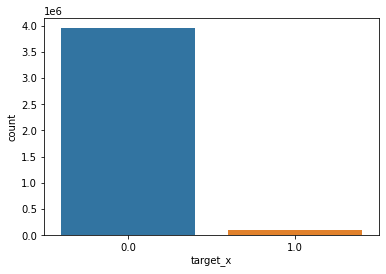

In [231]:
sns.countplot(x = gooddf['target_x'])

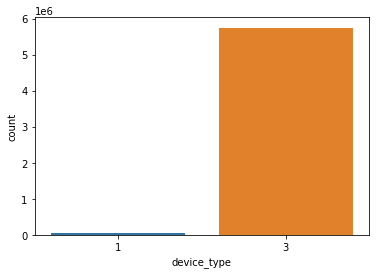

In [270]:
sns.countplot(x = df['device_type'])

In [345]:
pd.crosstab(df['device_type'], df['target'])

target,0,1
device_type,,
1,57529,495
3,5666617,77759


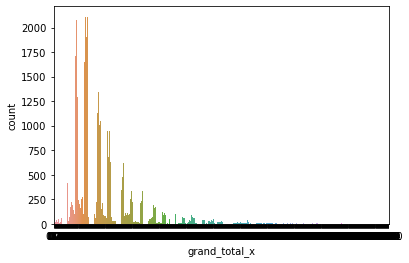

In [325]:
sns.countplot(x = gooddf['grand_total_x'])

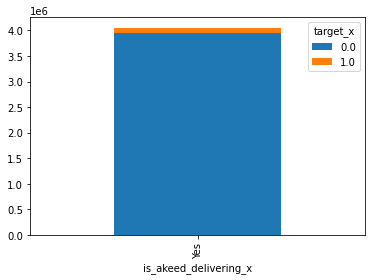

In [279]:
pd.crosstab(gooddf['is_akeed_delivering_x'], gooddf['target_x']).plot(kind='bar', stacked=True)

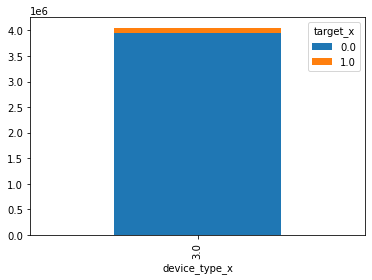

In [334]:
pd.crosstab(gooddf['device_type_x'], gooddf['target_x']).plot(kind='bar', stacked=True)

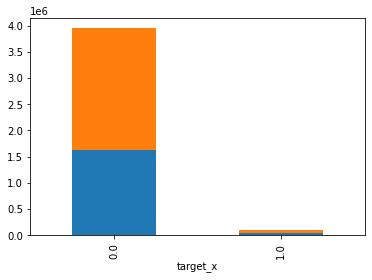

In [337]:
pd.crosstab(gooddf['target_x'], gooddf['delivery_charge_x'] ).plot(kind='bar', stacked=True, legend = None)

In [340]:
pd.crosstab(gooddf['target_x'], gooddf['delivery_charge_x'], normalize = True)

delivery_charge_x,0.000000,0.700000
target_x,,
0.000000,0.402161,0.572211
1.000000,0.013350,0.012278


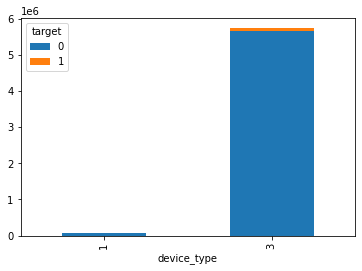

In [269]:
pd.crosstab(df['device_type'], df['target']).plot(kind='bar', stacked=True)

In [233]:
pd.crosstab(gooddf['delivery_charge_x'], gooddf['target_x'])

target_x,0.000000,1.000000
delivery_charge_x,,
0.000000,1629554,54095
0.700000,2318592,49750


<Figure size 3600x1440 with 0 Axes>

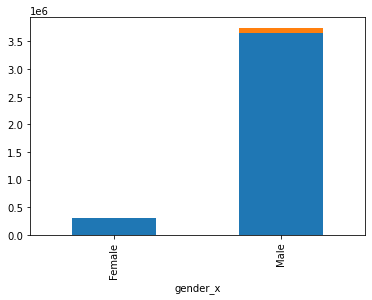

In [323]:
plt.figure(figsize=(50,20))
pd.crosstab(gooddf['gender_x'], gooddf['target_x']).plot(kind='bar', stacked=True, legend = None)

In [341]:
pd.crosstab(gooddf['gender_x'], gooddf['target_x'])

target_x,0.000000,1.000000
gender_x,,
Female,295765,7121
Male,3652381,96724


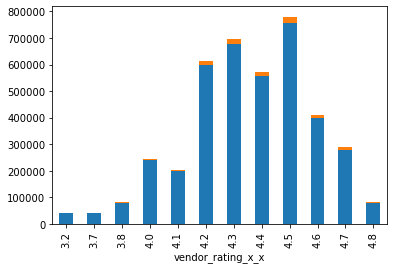

In [282]:
pd.crosstab(gooddf['vendor_rating_x_x'], gooddf['target_x']).plot(kind='bar', stacked=True, legend = None)

In [332]:
pd.crosstab(gooddf['grand_total_x'], gooddf['target_x']).sort_values(by = 'target_x')

KeyError: 'target_x'

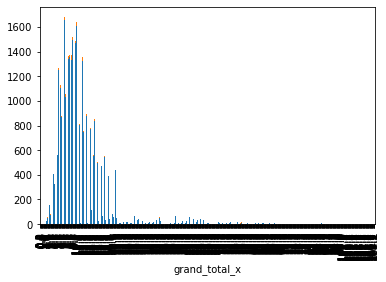

In [333]:
pd.crosstab(gooddf['grand_total_x'], gooddf['is_favorite_x']).plot(kind='bar', stacked=True, legend = None, label = False)

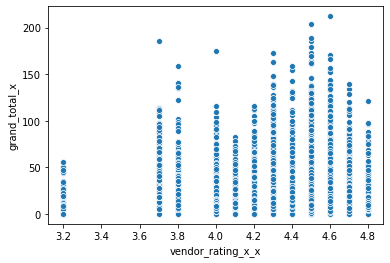

In [276]:
sns.scatterplot(gooddf['vendor_rating_x_x'], gooddf['grand_total_x'])

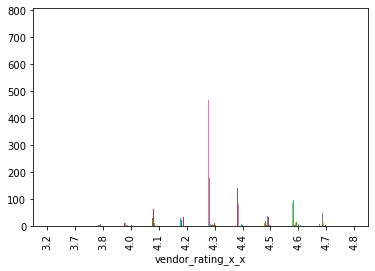

In [285]:
pd.crosstab(gooddf['vendor_rating_x_x'], gooddf['grand_total_x']).plot(kind='bar', legend = None)

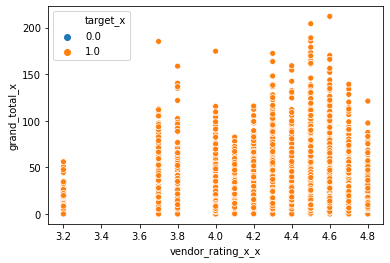

In [281]:
sns.scatterplot(gooddf['vendor_rating_x_x'], gooddf['grand_total_x'], hue = gooddf['target_x'] )

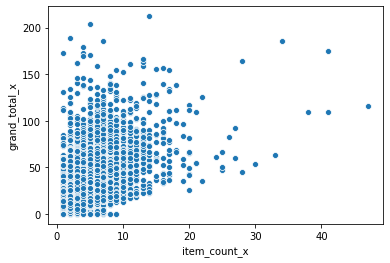

In [320]:
sns.scatterplot(gooddf['item_count_x'], gooddf['grand_total_x'])

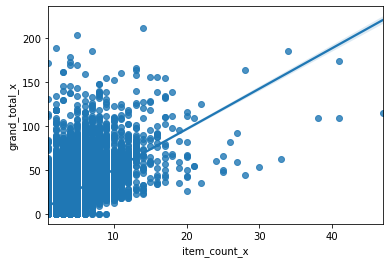

In [321]:
sns.regplot(gooddf['item_count_x'], gooddf['grand_total_x'])

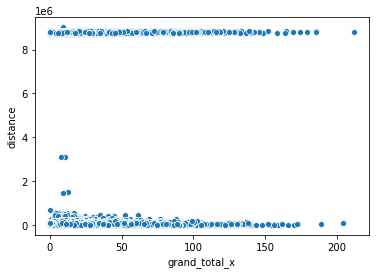

In [278]:
sns.scatterplot(gooddf['grand_total_x'], gooddf['distance'])

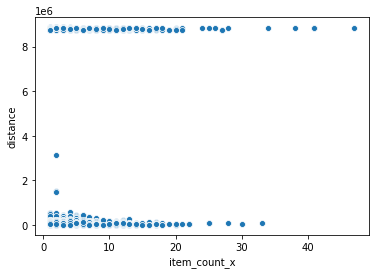

In [280]:
sns.scatterplot(gooddf['item_count_x'], gooddf['distance'])

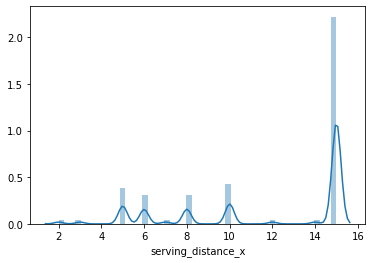

In [287]:
sns.distplot(gooddf['serving_distance_x'])

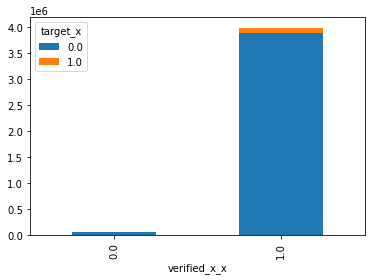

In [243]:
pd.crosstab(gooddf['verified_x_x'], gooddf['target_x']).plot(kind='bar', stacked=True)

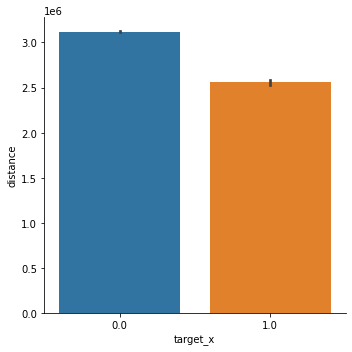

In [261]:
sns.catplot(x="target_x", y="distance", kind="bar", data=gooddf)


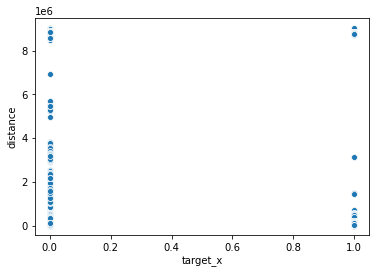

In [294]:
sns.scatterplot(x="target_x", y="distance",  data=gooddf)

In [272]:
pd.crosstab(gooddf['target_x'], gooddf['grand_total_x'])

grand_total_x,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000,1.100000,1.200000,1.300000,1.400000,1.500000,1.600000,1.700000,1.800000,1.900000,2.100000,2.200000,2.300000,2.400000,2.500000,2.600000,2.700000,2.800000,2.900000,3.000000,3.100000,3.200000,3.300000,3.400000,3.500000,3.600000,3.700000,3.800000,3.900000,4.000000,4.100000,4.200000,4.300000,4.400000,4.500000,4.600000,4.700000,4.800000,4.900000,5.000000,5.100000,5.200000,5.300000,5.400000,5.500000,5.600000,5.700000,5.800000,5.900000,6.000000,6.100000,6.200000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.100000,7.200000,7.300000,7.400000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,8.100000,8.200000,8.300000,8.400000,8.500000,8.600000,8.700000,8.800000,8.900000,9.000000,9.100000,9.200000,9.300000,9.400000,9.500000,9.600000,9.700000,9.800000,9.900000,10.000000,10.100000,10.200000,10.300000,10.400000,10.500000,10.600000,10.700000,10.800000,10.900000,11.000000,11.100000,11.200000,11.300000,11.400000,11.500000,11.600000,11.700000,11.800000,11.900000,12.000000,12.100000,12.200000,12.300000,12.400000,12.500000,12.600000,12.700000,12.800000,12.900000,13.000000,13.100000,13.200000,13.300000,13.400000,13.500000,13.600000,13.700000,13.800000,13.900000,14.000000,14.100000,14.200000,14.300000,14.400000,14.500000,14.600000,14.700000,14.800000,14.900000,15.000000,15.100000,15.200000,15.300000,15.400000,15.500000,15.600000,15.700000,15.800000,15.900000,16.000000,16.100000,16.200000,16.300000,16.400000,16.500000,16.600000,16.700000,16.800000,16.900000,17.000000,17.100000,17.200000,17.300000,17.400000,17.500000,17.600000,17.700000,17.800000,17.900000,18.000000,18.100000,18.200000,18.300000,18.400000,18.500000,18.600000,18.700000,18.800000,18.900000,19.000000,19.100000,19.200000,19.300000,19.400000,19.500000,19.600000,19.700000,19.800000,19.900000,20.000000,20.100000,20.200000,20.300000,20.400000,20.500000,20.600000,20.700000,20.800000,20.900000,21.000000,21.100000,21.200000,21.300000,21.400000,21.500000,21.600000,21.700000,21.800000,21.900000,22.000000,22.100000,22.200000,22.300000,22.400000,22.500000,22.600000,22.700000,22.800000,22.900000,23.000000,23.100000,23.200000,23.300000,23.400000,23.500000,23.600000,23.700000,23.800000,23.900000,24.000000,24.100000,24.200000,24.300000,24.400000,24.500000,24.600000,24.700000,24.800000,24.900000,25.000000,...,79.900000,80.000000,80.100000,80.200000,80.400000,80.500000,80.700000,81.000000,81.200000,81.300000,81.500000,81.800000,82.000000,82.100000,82.200000,82.400000,82.500000,82.600000,82.700000,82.800000,82.900000,83.000000,83.200000,83.300000,83.500000,83.600000,83.700000,83.800000,84.000000,84.100000,84.200000,84.500000,84.700000,84.800000,85.000000,85.100000,85.200000,85.400000,85.600000,85.800000,85.900000,86.200000,86.300000,86.400000,86.600000,86.700000,87.000000,87.200000,87.300000,87.500000,87.800000,88.100000,88.300000,88.400000,88.600000,88.700000,88.900000,89.000000,89.100000,89.200000,89.400000,89.500000,89.700000,89.900000,90.000000,90.100000,90.200000,90.400000,90.500000,90.700000,90.800000,91.000000,91.100000,91.200000,91.300000,91.400000,91.500000,91.600000,91.900000,92.000000,92.100000,92.400000,92.500000,92.800000,93.000000,93.200000,93.500000,93.600000,94.300000,94.400000,94.700000,94.900000,95.200000,95.300000,95.400000,95.500000,95.700000,95.800000,96.100000,96.200000,96.400000,96.800000,97.000000,97.200000,97.500000,97.600000,97.900000,98.400000,98.700000,98.800000,98.900000,99.200000,99.300000,99.500000,99.800000,100.000000,100.100000,100.200000,100.300000,100.800000,101.100000,101.500000,101.800000,101.900000,102.100000,102.400000,102.600000,102.700000,102.900000,103.200000,104.100000,104.400000,104.700000,104.900000,105.200000,105.500000,105.700000,106.100000,106.600000,107.100000,107.300000,107.700000,107.800000,108.400000,108.500000,108.600000,108.900000,109.000000,109.300000,109.400000,109.500000,109.800000,110.100000,110.600000,11

In [ ]:
#distance + C(vendor_rating_x_x) + serving_distance_x + C(gender_x) + C(verified_x_x) +C(delivery_charge_x)

In [245]:
#top10UserID's
gooddf['customer_id_x_x'].value_counts()

5EP9F62    1889
YQC2R6H    1691
4UZKXW2    1584
V2A9RXW    1531
YYKZN0F    1490
           ... 
V9OAIO6      99
JYKRSPO      99
JAY54XA      99
5GL2Z9N      99
OJZ5WJD      99
Name: customer_id_x_x, Length: 22093, dtype: int64

Hey there should be more orders from higher rated vendors, why is that not. Are vendors from one category more likely to get highly rated - is there a difference between vendors with different categorys - a different set of customers? Do these customers buy more, - all of this is figured out using more EDA and will help in our future recommender model.

In [ ]:
#repeatOrders